In [14]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation, preprocessing

# Goal 1, Easy: Draw a Histogram

In [15]:
#import life expectancy data
life = pd.read_excel('gapminder_lifeexpectancy.xlsx', index_col=0)

In [16]:
life.head(3)

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Life expectancy,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,28.21,28.2,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#select a few years
lifeexp = life[[1950, 1975, 2000, 2015]]

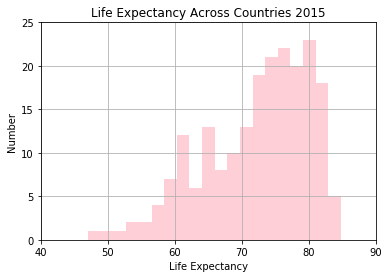

In [18]:
#plot 2015
lifeexp[2015].hist(bins = 20, facecolor='pink',alpha=0.75)
plt.title('Life Expectancy Across Countries 2015')
plt.xlabel('Life Expectancy')
plt.ylabel('Number')
plt.axis([40, 90.0, 0.0, 25.0])
plt.savefig('histo.png', dpi = 150)

# Goal 1, Medium: Complete the exercise long vs wide tables

In [19]:
#import fertility data
fert = pd.read_csv('gapminder_total_fertility.csv', index_col=0)

In [20]:
print(life.shape, fert.shape)

(260, 217) (260, 216)


In [21]:
fert.columns

Index(['1800', '1801', '1802', '1803', '1804', '1805', '1806', '1807', '1808',
       '1809',
       ...
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015'],
      dtype='object', length=216)

In [22]:
life.columns

Int64Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
            ...
            2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', length=217)

In [23]:
# create a list of years as integers
ncol = [int(x) for x in fert.columns]
# use list as new columns for fert to change columns from objects
fert.set_axis(axis=1, labels=ncol, inplace=True)

In [24]:
# creating a heirarchical index in long format
sfert = fert.stack()
slife = life.stack()

In [25]:
# convert series to data frames
d = {'fertility': sfert, 'lifeexp': slife}
df2 = pd.DataFrame(data=d)

In [26]:
# repeat with pop
pop = pd.read_excel('gapminder_population.xlsx', index_col=0)
print(pop.shape)

(275, 81)


In [27]:
spop = pop.stack()

In [28]:
d = {'fertility': sfert, 'lifeexp': slife, 'population': spop}
df2 = pd.DataFrame(data=d)

In [29]:
df2.head(3)

fertility  lifeexp  population
Afghanistan 1800        7.0    28.21   3280000.0
            1801        7.0    28.20         NaN
            1802        7.0    28.19         NaN

In [30]:
# interpret all indices as row indices
df3 = df2.stack()

In [38]:
df3.head(3)

Afghanistan  1800  fertility           7.00
                   lifeexp            28.21
                   population    3280000.00
dtype: float64

In [31]:
# convert long table back to wide table
# years on left with life exp, fert on top
df4 = df3.unstack((0,2))

In [32]:
df4.head(10)

Afghanistan                    Akrotiri and Dhekelia   Albania          \
       fertility lifeexp population            population fertility lifeexp   
1800         7.0   28.21  3280000.0                   NaN       4.6    35.4   
1801         7.0   28.20        NaN                   NaN       4.6    35.4   
1802         7.0   28.19        NaN                   NaN       4.6    35.4   
1803         7.0   28.18        NaN                   NaN       4.6    35.4   
1804         7.0   28.17        NaN                   NaN       4.6    35.4   
1805         7.0   28.16        NaN                   NaN       4.6    35.4   
1806         7.0   28.15        NaN                   NaN       4.6    35.4   
1807         7.0   28.14        NaN                   NaN       4.6    35.4   
1808         7.0   28.13        NaN                   NaN       4.6    35.4   
1809         7.0   28.12        NaN                   NaN       4.6    35.4   

                  Algeria                      ...        Yemen Yugoslavia  \
     population fertility lifeexp population   ...   population population   
1800   410445.0      6.99   28.82  2503218.0   ...    2593000.0        NaN   
1801        NaN      6.99   28.82        NaN   ...          NaN        NaN   
1802        NaN      6.99   28.82        NaN   ...          NaN        NaN   
1803        NaN      6.99   28.82        NaN   ...          NaN        NaN   
1804        NaN      6.99   28.82        NaN   ...          NaN        NaN   
1805        NaN      6.99   28.82        NaN   ...          NaN        NaN   
1806        NaN      6.99   28.82        NaN   ...          NaN        NaN   
1807        NaN      6.99   28.82        NaN   ...          NaN        NaN   
1808        NaN      6.99   28.82        NaN   ...          NaN        NaN   
1809        NaN      6.99   28.82        NaN   ...          NaN        NaN   

        Zambia                     Zimbabwe                         Åland  \
     fertility lifeexp population fertility lifeexp population population   
1800      6.71    32.6   747000.0      6.75    33.7  1085814.0        NaN   
1801      6.71    32.6        NaN      6.75    33.7        NaN        NaN   
1802      6.71    32.6        NaN      6.75    33.7        NaN        NaN   
1803      6.71    32.6        NaN      6.75    33.7        NaN        NaN   
1804      6.71    32.6        NaN      6.75    33.7        NaN        NaN   
1805      6.71    32.6        NaN      6.75    33.7        NaN        NaN   
1806      6.71    32.6        NaN      6.75    33.7        NaN        NaN   
1807      6.71    32.6        NaN      6.75    33.7        NaN        NaN   
1808      6.71    32.6        NaN      6.75    33.7        NaN        NaN   
1809      6.71    32.6        NaN      6.75    33.7        NaN        NaN   

              
     lifeexp  
1800     NaN  
1801     NaN  
1802     NaN  
1803     NaN  
1804     NaN  
1805     NaN  
1806     NaN  
1807     NaN  
1808     NaN  
1809     NaN  

[10 rows x 667 columns]

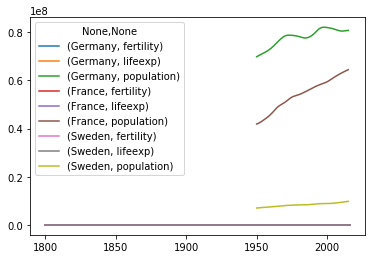

In [33]:
# plot specific countries
df4[['Germany', 'France', 'Sweden']].plot()

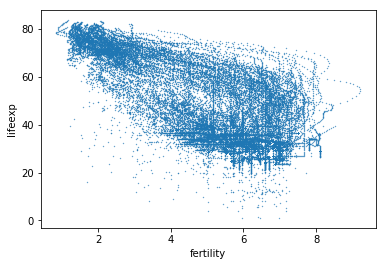

In [34]:
# create scatterplot with data from df3
df5 = df3.unstack(2)
df5.plot.scatter('fertility', 'lifeexp', s=0.1)

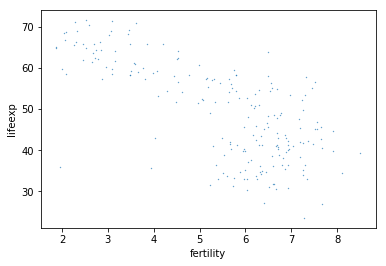

In [35]:
# using unstack and stack select a year

df6 = df3.unstack(1)
df6 = df6[1950]
df6 = df6.unstack(1)
df6.plot.scatter('fertility', 'lifeexp', s=0.1)

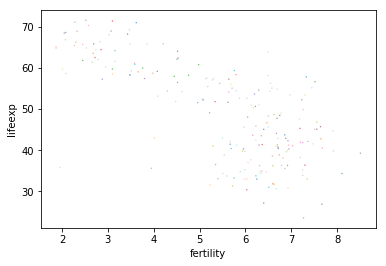

In [422]:
# color each country
cmap = plt.get_cmap('tab20').colors
df6.plot.scatter('fertility', 'lifeexp', s=0.1, c=cmap)

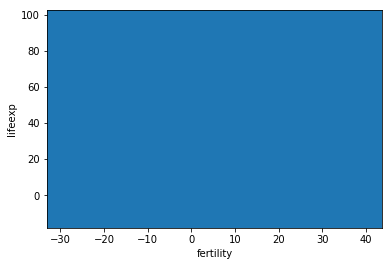

In [430]:
# provide size of dots porportional to population
df6.plot.scatter('fertility', 'lifeexp', s=df6['population'], c=cmap)

In [431]:
# decrease size of population by a factor of 100000 for plotting purposes
df6['population small'] = df6['population'] / 100000

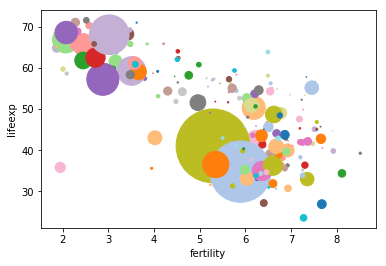

In [432]:
# now it's pretty
df6.plot.scatter('fertility', 'lifeexp', s=df6['population small'], c=cmap)

# Goal 1, Hard: Create an animated scatterplot

/Users/glynismattheisen/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


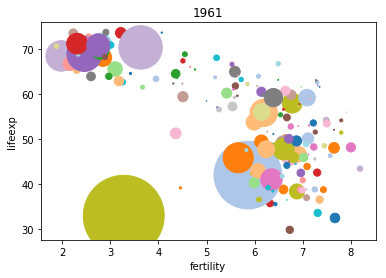

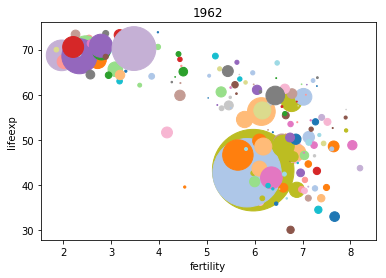

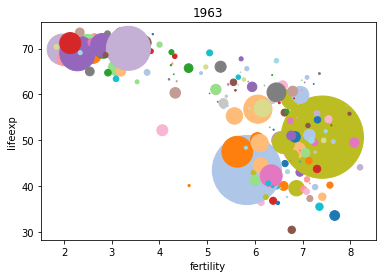

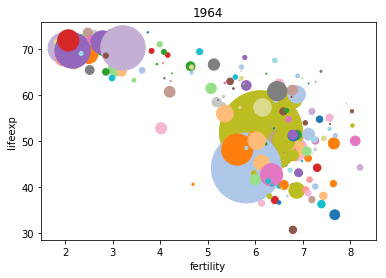

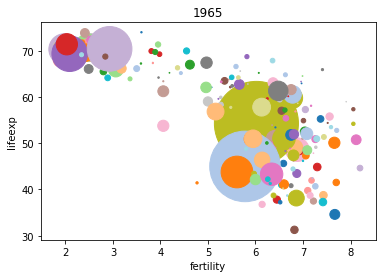

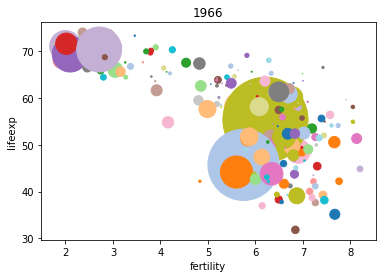

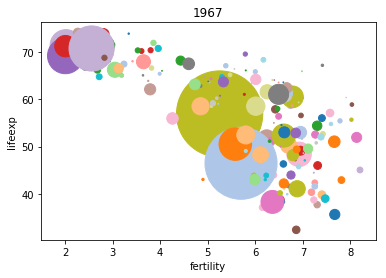

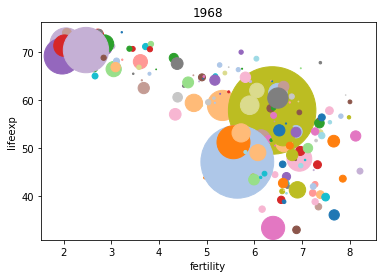

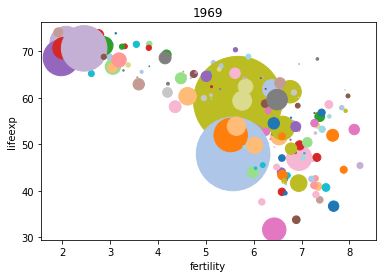

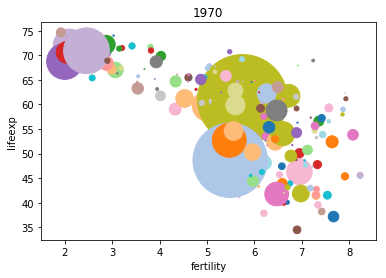

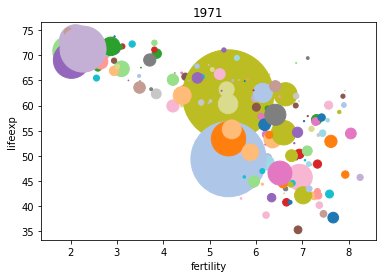

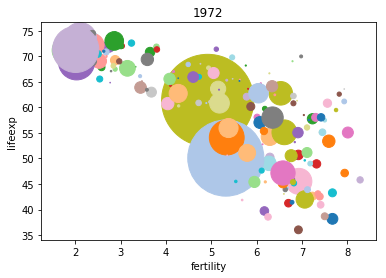

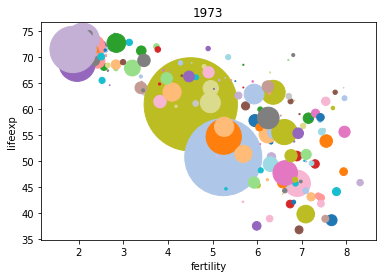

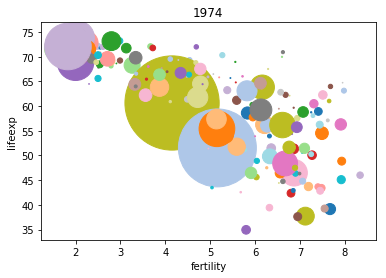

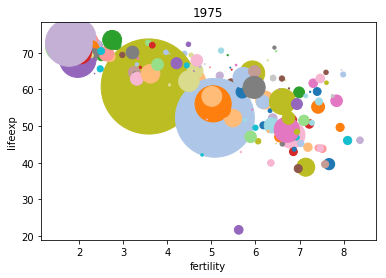

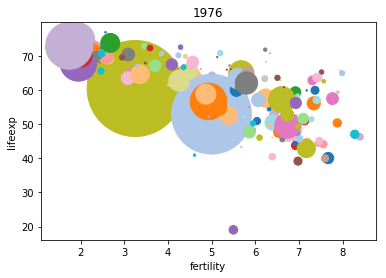

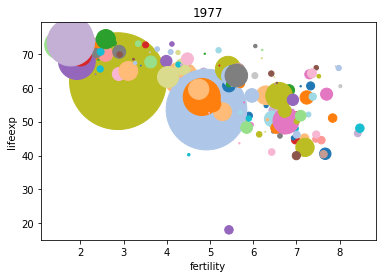

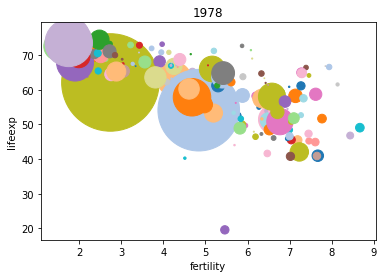

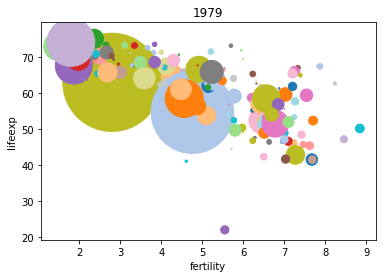

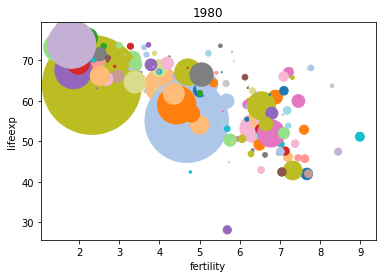

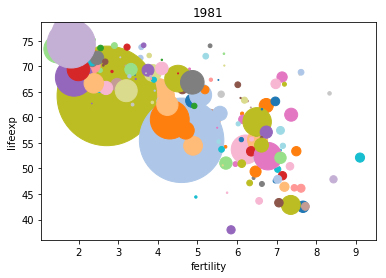

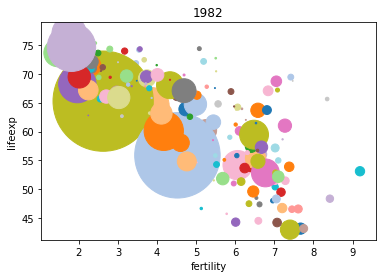

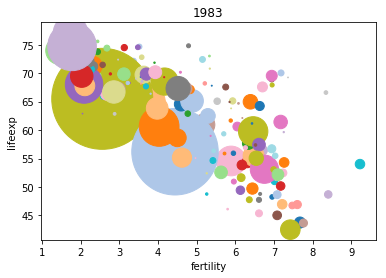

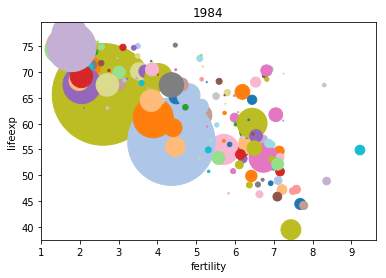

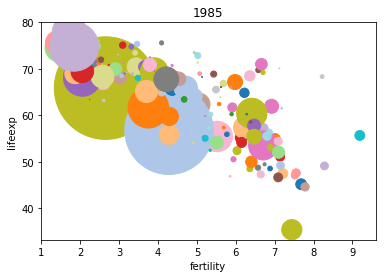

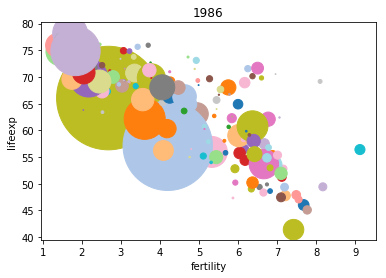

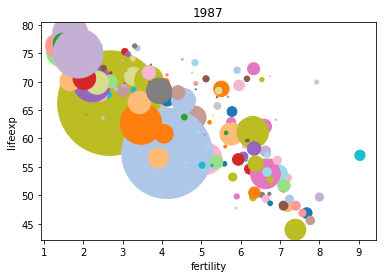

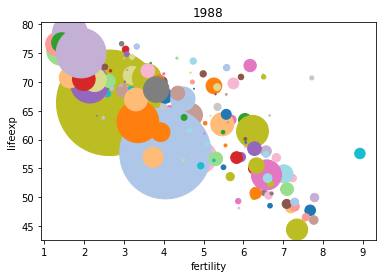

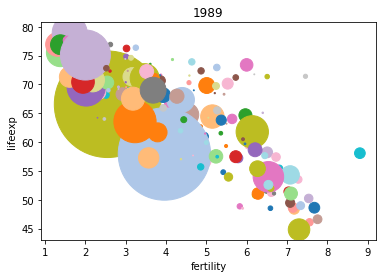

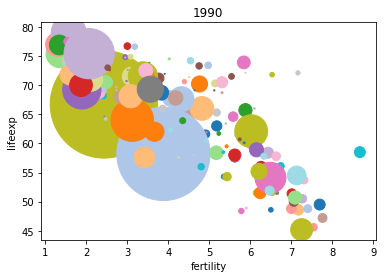

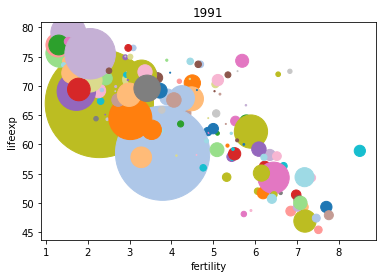

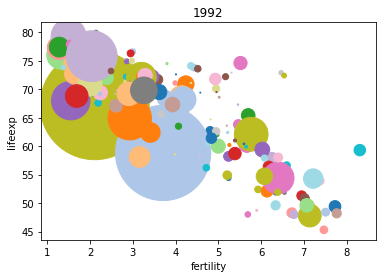

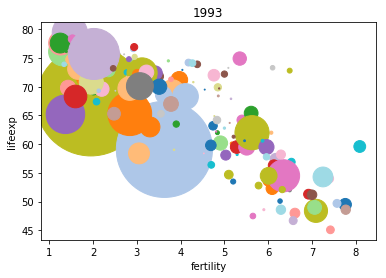

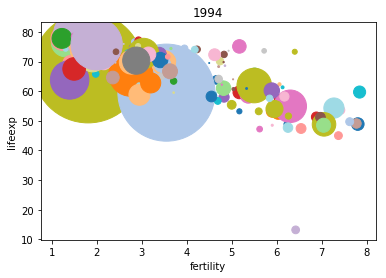

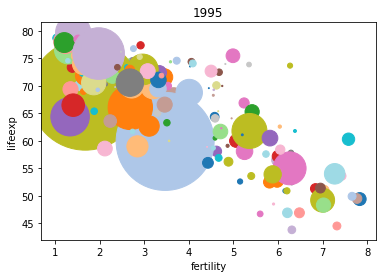

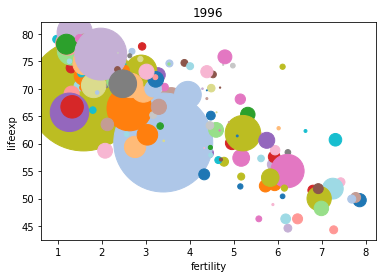

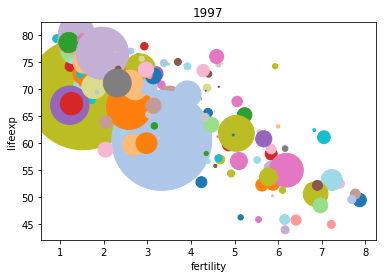

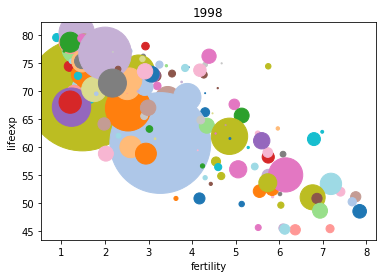

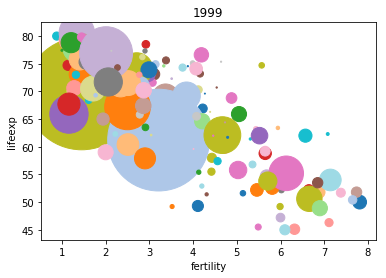

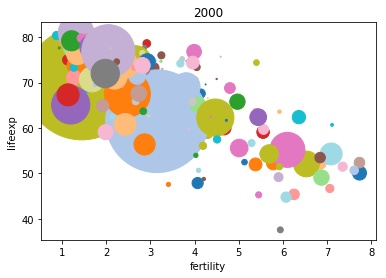

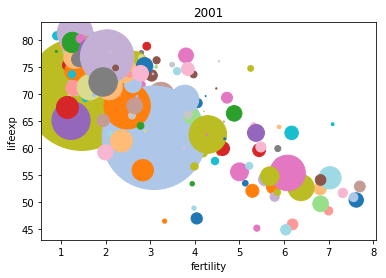

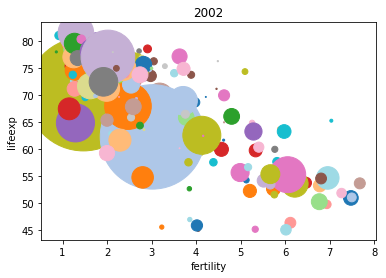

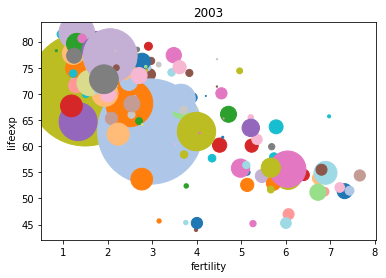

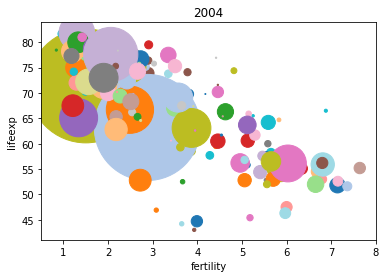

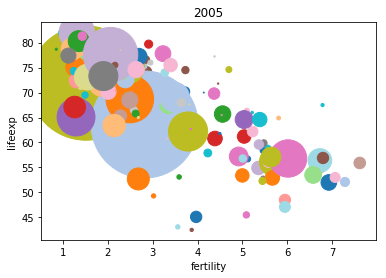

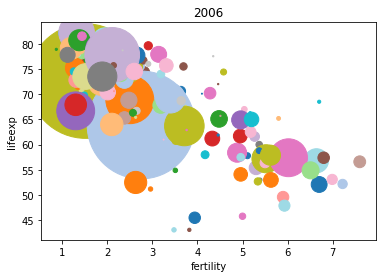

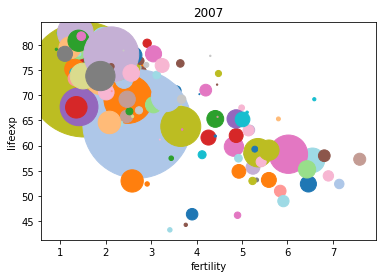

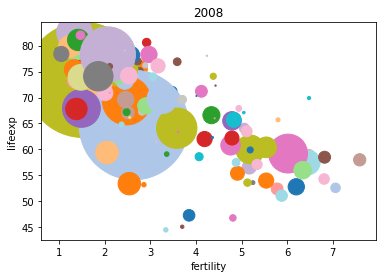

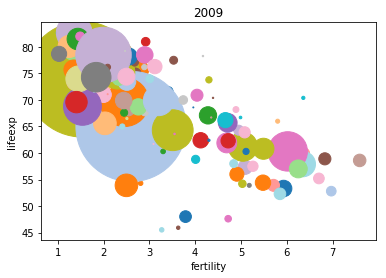

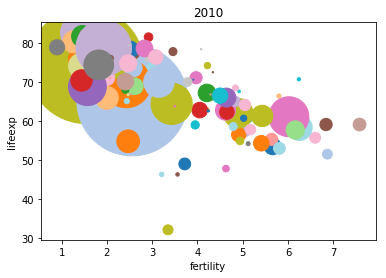

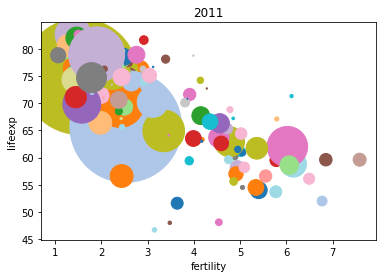

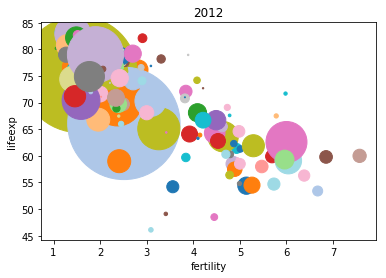

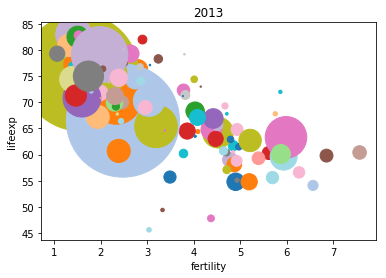

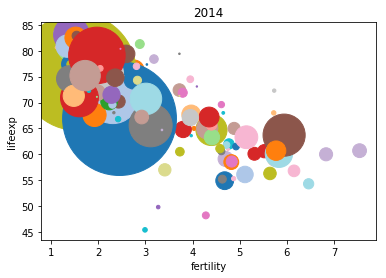

In [433]:
# for loop to create a plot for each year between 1960 and 2015
for i in range (1961,2015):
    df_g = df3.unstack(1)
    df_g = df_g[i]
    df_g = df_g.unstack(1)
    cmap = plt.get_cmap('tab20').colors
    df_g['population small'] = df_g['population'] / 100000
    df_g.plot.scatter('fertility', 'lifeexp', s=df_g['population small'], c=cmap, title = i)
    text = 'lifeexp_' + str(i) + '.png'
    plt.savefig(text)

In [434]:
# save graphs as a GIF!

import imageio

images = []

for i in range(1960, 2015):
    filename = 'lifeexp_{}.png'.format(i)
    images.append(imageio.imread(filename))

imageio.mimsave('output.gif', images, fps=20)

# Goal 2: Titanic

In [1192]:
# import train and predict files
train_df = pd.read_csv('train.csv')
predict_df = pd.read_csv('predict.csv')

In [1193]:
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [1194]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [1195]:
# Age and Fare are floats
# Name, Sex, Ticket, Cabin, Embarked are objects

In [1196]:
# determine what percentage of each field is null
total = train_df.isnull().sum().sort_values(ascending=False)
percent = train_df.isnull().sum()/train_df.isnull().count()*100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', '%'],sort=True)
missing_data

,Total,%
Age,177,19.865320
Cabin,687,77.104377
Embarked,2,0.224467
Fare,0,0.000000
Name,0,0.000000
Parch,0,0.000000
PassengerId,0,0.000000
Pclass,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000


In [1197]:
# lots of null in age, wouldn't be good to dropna because you lose too much data
# lots of null in cabin

# Fixing/Altering the Data

In [1198]:
#drop Ticket, Cabin, Passenger Id, Name from both lists because they won't correlate to anything
train_df = train_df.drop(['Ticket', 'Cabin','PassengerId','Name'],axis=1)
predict_df = predict_df.drop(['Ticket', 'Cabin'],axis=1)

In [1199]:
data = [train_df,predict_df]
# replace null Age values with a value in a range of the mean age +/- 1 stdev
for dataset in data:
    mean = dataset["Age"].mean()
    std = dataset["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in 'Age' column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = dataset["Age"].astype(int)
    
#confirm null values count = 0
train_df["Age"].isnull().sum()

0

In [1200]:
#replace male == 0 and female == 1
genders = {"male": 0, "female": 1}
data = [train_df, predict_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [1201]:
# figure out the values for embarked
train_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [1202]:
# determine most common value for embarked
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [1203]:
# replace null values with the most common value
embarked_value = 'S'
data = [train_df,predict_df]
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(embarked_value)

In [1204]:
train_df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22,1,0,7.2500,S
1,1,1,1,38,1,0,71.2833,C
2,1,3,1,26,0,0,7.9250,S


In [1205]:
#replace port names with integer values
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, predict_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [1206]:
train_df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22,1,0,7.2500,0
1,1,1,1,38,1,0,71.2833,1
2,1,3,1,26,0,0,7.9250,0


In [1207]:
# create two new columns 'solo' to show who is alone or not and 'relatives' to include number of relatives
data = [train_df, predict_df]

for dataset in data:
    dataset['Relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['Relatives'] > 0, 'Solo'] = 0
    dataset.loc[dataset['Relatives'] == 0, 'Solo'] = 1
    dataset['Solo'] = dataset['Solo'].astype(int)
train_df['Solo'].value_counts()

1    537
0    354
Name: Solo, dtype: int64

In [1208]:
# remove SibSp, Parch because they are now redundant
train_df = train_df.drop("SibSp", axis=1)
train_df = train_df.drop("Parch", axis=1)
predict_df = predict_df.drop("SibSp", axis=1)
predict_df = predict_df.drop("Parch", axis=1)

In [1209]:
train_df.head(3)

,Survived,Pclass,Sex,Age,Fare,Embarked,Relatives,Solo
0,0,3,0,22,7.2500,0,1,0
1,1,1,1,38,71.2833,1,1,0
2,1,3,1,26,7.9250,0,0,1


## What determines survival?

In [1210]:
train_df.corr(method= 'pearson')

,Survived,Pclass,Sex,Age,Fare,Embarked,Relatives,Solo
Survived,1.000000,-0.338481,0.543351,-0.067722,0.257307,0.106811,0.016639,-0.203367
Pclass,-0.338481,1.000000,-0.131900,-0.295271,-0.549500,0.045702,0.065997,0.135207
Sex,0.543351,-0.131900,1.000000,-0.076799,0.182333,0.116569,0.200988,-0.303646
Age,-0.067722,-0.295271,-0.076799,1.000000,0.086557,0.019482,-0.236794,0.170240
Fare,0.257307,-0.549500,0.182333,0.086557,1.000000,0.062142,0.217138,-0.271832
Embarked,0.106811,0.045702,0.116569,0.019482,0.062142,1.000000,-0.080281,0.017807
Relatives,0.016639,0.065997,0.200988,-0.236794,0.217138,-0.080281,1.000000,-0.690922
Solo,-0.203367,0.135207,-0.303646,0.170240,-0.271832,0.017807,-0.690922,1.000000


In [1211]:
# taking a look at what column correlates best to survival
train_df.groupby("Survived").mean()

,Pclass,Sex,Age,Fare,Embarked,Relatives,Solo
Survived,,,,,,,
0,2.531876,0.147541,30.316940,22.117887,0.307832,0.883424,0.681239
1,1.950292,0.681287,28.423977,48.395408,0.447368,0.938596,0.476608


### Low Pclass, Female, High Fare, Not Being Alone correlate most strongly to survival

In [1212]:
#Going to extract just passenger class and survived columns to compare
# grouping by passenger class mean
# sorting then the survived column in descending order
train_df[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


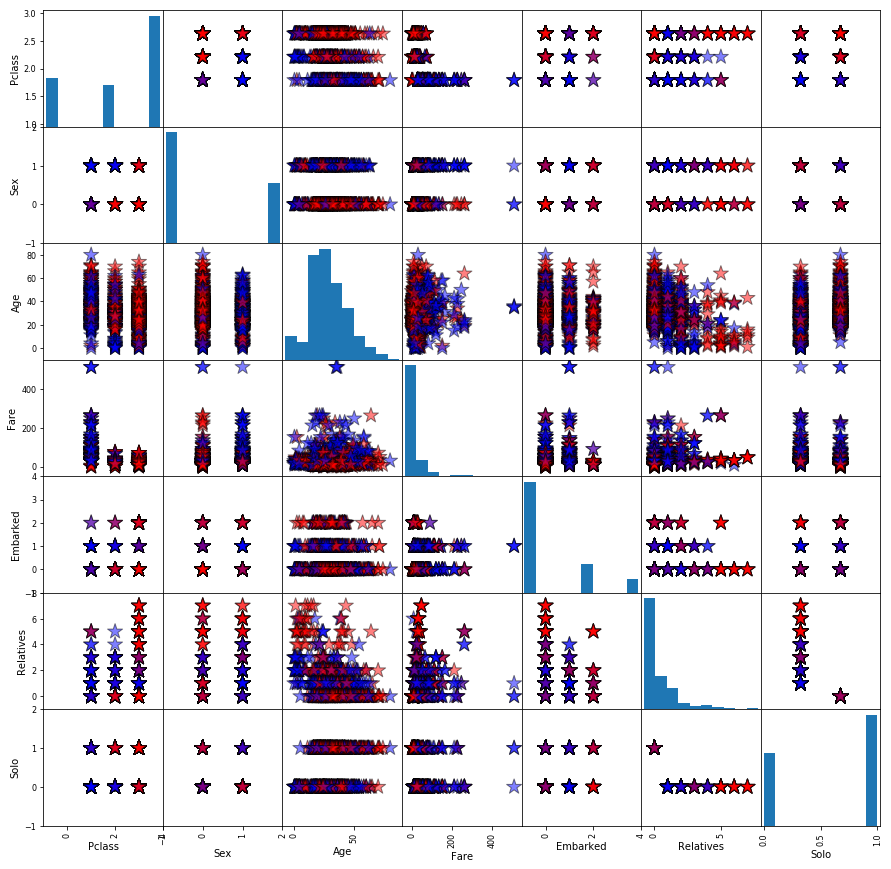

In [1213]:
color_list = ['red' if i== 0 else 'blue' for i in train_df.loc[:,'Survived']]

axarr = pd.plotting.scatter_matrix(train_df.loc[:, train_df.columns != 'Survived'],
                                       c=color_list,
                                       figsize= [15,15],
                                       diagonal='hist',
                                       alpha=0.5,
                                       s = 250,
                                       marker = '*',
                                       edgecolor= "black")

# y = [0 PCLASS] xlim(-1,4)
# x = [1 SEX] xlim (-1,2)
# x = [2 AGE] xlim (-10,90)
# x = [3 FARE] xlim (-50,550)
# x = [4 EMBARKED] xlim (-1,4)
# x = [5 RELATIVES] xlim (-1,8)
# x = [6 SOLO] xlim (-1,2)
axarr[0,1].set_ylim(-1,4)
axarr[0,1].set_xlim(-1,2)

axarr[0,2].set_ylim(-1,4)
axarr[0,2].set_xlim(-10,90)

axarr[0,3].set_ylim(-1,4)
axarr[0,3].set_xlim(-50,550)

axarr[0,4].set_ylim(-1,4)
axarr[0,4].set_xlim(-1,4)

axarr[0,5].set_ylim(-1,4)
axarr[0,5].set_xlim(-1,8)

axarr[0,6].set_ylim(-1,4)
axarr[0,6].set_xlim(-1,2)


# SEX

axarr[1,0].set_ylim(-1,2)
axarr[1,0].set_xlim(-1,4)

axarr[1,2].set_ylim(-1,2)
axarr[1,2].set_xlim(-10,90)

axarr[1,3].set_ylim(-1,2)
axarr[1,3].set_xlim(-50,550)

axarr[1,4].set_ylim(-1,2)
axarr[1,4].set_xlim(-1,4)

axarr[1,5].set_ylim(-1,2)
axarr[1,5].set_xlim(-1,8)

axarr[1,6].set_ylim(-1,2)
axarr[1,6].set_xlim(-1,2)

# AGE

axarr[2,0].set_ylim(-10,90)
axarr[2,0].set_xlim(-1,4)

axarr[2,1].set_ylim(-10,90)
axarr[2,1].set_xlim(-1,2)

axarr[2,3].set_ylim(-10,90)
axarr[2,3].set_xlim(-50,550)

axarr[2,4].set_ylim(-10,90)
axarr[2,4].set_xlim(-1,4)

axarr[2,5].set_ylim(-10,90)
axarr[2,5].set_xlim(-1,8)

axarr[2,6].set_ylim(-10,90)
axarr[2,6].set_xlim(-1,2)

# FARE

axarr[3,0].set_ylim(-50,550)
axarr[3,0].set_xlim(-1,4)

axarr[3,1].set_ylim(-50,550)
axarr[3,1].set_xlim(-1,2)

axarr[3,2].set_ylim(-50,550)
axarr[3,2].set_xlim(-10,90)

axarr[3,4].set_ylim(-50,550)
axarr[3,4].set_xlim(-1,4)

axarr[3,5].set_ylim(-50,550)
axarr[3,5].set_xlim(-1,8)

axarr[3,6].set_ylim(-50,550)
axarr[3,6].set_xlim(-1,2)

# EMBARKED

axarr[4,0].set_ylim(-1,4)
axarr[4,0].set_xlim(-1,4)

axarr[4,1].set_ylim(-1,4)
axarr[4,1].set_xlim(-1,2)

axarr[4,2].set_ylim(-1,4)
axarr[4,2].set_xlim(-10,90)

axarr[4,3].set_ylim(-1,4)
axarr[4,3].set_xlim(-50,550)

axarr[4,5].set_ylim(-1,4)
axarr[4,5].set_xlim(-1,8)

axarr[4,6].set_ylim(-1,4)
axarr[4,6].set_xlim(-1,2)

# RELATIVES

axarr[5,0].set_ylim(-1,8)
axarr[5,0].set_xlim(-1,4)

axarr[5,1].set_ylim(-1,8)
axarr[5,1].set_xlim(-1,2)

axarr[5,2].set_ylim(-1,8)
axarr[5,2].set_xlim(-10,90)

axarr[5,3].set_ylim(-1,8)
axarr[5,3].set_xlim(-50,550)

axarr[5,4].set_ylim(-1,8)
axarr[5,4].set_xlim(-1,4)

axarr[5,6].set_ylim(-1,8)
axarr[5,6].set_xlim(-1,2)

# SOLO

axarr[6,0].set_ylim(-1,2)
axarr[6,0].set_xlim(-1,4)

axarr[6,1].set_ylim(-1,2)
axarr[6,1].set_xlim(-1,2)

axarr[6,2].set_ylim(-1,2)
axarr[6,2].set_xlim(-10,90)

axarr[6,3].set_ylim(-1,2)
axarr[6,3].set_xlim(-50,550)

axarr[6,4].set_ylim(-1,2)
axarr[6,4].set_xlim(-1,4)

axarr[6,5].set_ylim(-1,2)
axarr[6,5].set_xlim(-1,8)


plt.show()

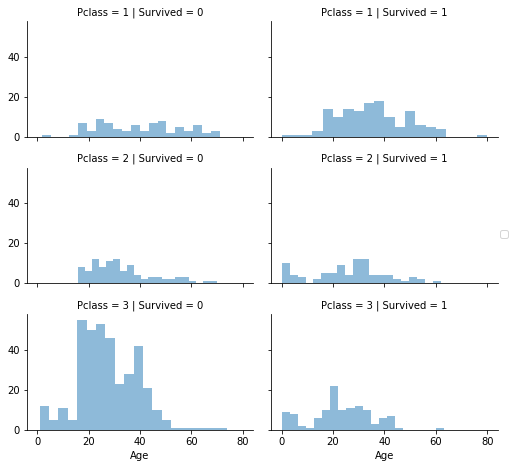

In [1214]:
# low Pclass closely correlates to survival
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

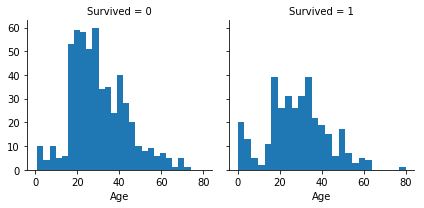

In [1215]:
# Age does not show a strong correlation
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=25)

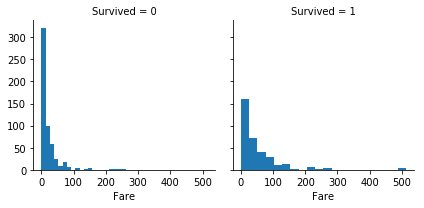

In [1216]:
# Those who pais the lowest fare are more likely to die, likely related to Pclass
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Fare', bins=20)

/Users/glynismattheisen/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/glynismattheisen/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/glynismattheisen/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/glynismattheisen/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has

Text(0.5,1,'Male')

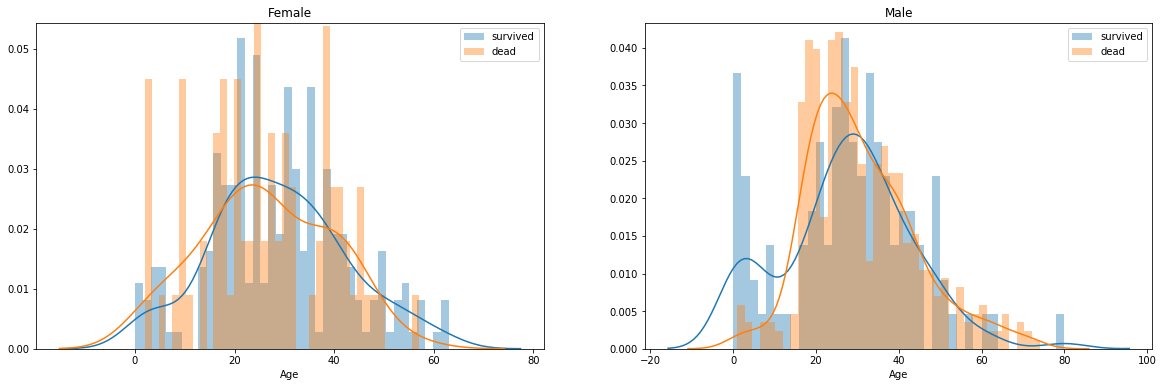

In [1217]:
# Females much more likely to survive indep of age

survived = 'survived'
not_survived = 'dead'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20, 6))
women = train_df[train_df['Sex']== 1]
men = train_df[train_df['Sex']== 0]
ax = sns.distplot(women[women['Survived']==1].Age, bins=40, label = survived, ax = axes[0], kde =True)
ax = sns.distplot(women[women['Survived']==0].Age, bins=40, label = not_survived, ax = axes[0], kde =True)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age, bins=40, label = survived, ax = axes[1], kde = True)
ax = sns.distplot(men[men['Survived']==0].Age, bins=40, label = not_survived, ax = axes[1], kde = True)
ax.legend()
ax.set_title('Male')

In [1218]:
#Going to extract just embarked and survived columns to compare
# grouping by embarked mean
# sorting then the survived column in descending order
train_df[['Embarked','Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Embarked,Survived
1,1,0.553571
2,2,0.389610
0,0,0.339009


/Users/glynismattheisen/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/glynismattheisen/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/glynismattheisen/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/glynismattheisen/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has

Text(0.5,1,'C')

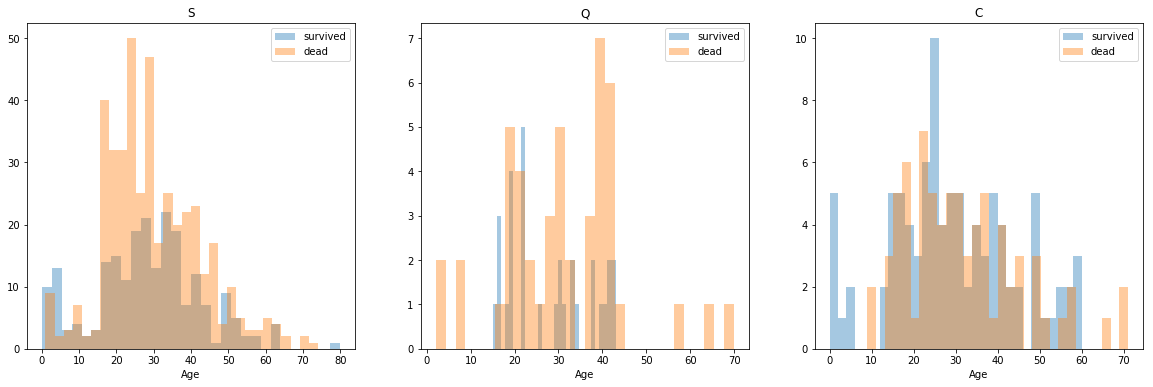

In [1219]:
ports = {"S": 0, "C": 1, "Q": 2}

survived = 'survived'
not_survived = 'dead'
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(20, 6))
#convert back to letters for visualization purposes
S = train_df[train_df['Embarked']== 0]
C = train_df[train_df['Embarked']== 1]
Q = train_df[train_df['Embarked']== 2]
ax = sns.distplot(S[S['Survived']==1].Age, bins=30, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(S[S['Survived']==0].Age, bins=30, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('S')
ax = sns.distplot(Q[Q['Survived']==1].Age, bins=30, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(Q[Q['Survived']==0].Age, bins=30, label = not_survived, ax = axes[1], kde = False)
ax.legend()
ax.set_title('Q')
ax = sns.distplot(C[C['Survived']==1].Age, bins=30, label = survived, ax = axes[2], kde = False)
ax = sns.distplot(C[C['Survived']==0].Age, bins=30, label = not_survived, ax = axes[2], kde = False)
ax.legend()
ax.set_title('C')

# More data wrangling

In [1220]:
# drop age and replace it with a column that bins ages into 10 groups

data = [train_df, predict_df]
for dataset in data:
    dataset['Age_Group'] = dataset['Age']
    dataset.loc[ dataset['Age_Group'] <= 1, 'Age_Group'] = 0
    dataset.loc[(dataset['Age_Group'] > 1) & (dataset['Age_Group'] <= 5), 'Age_Group'] = 1
    dataset.loc[(dataset['Age_Group'] > 5) & (dataset['Age_Group'] <= 8), 'Age_Group'] = 2
    dataset.loc[(dataset['Age_Group'] > 8) & (dataset['Age_Group'] <= 11), 'Age_Group'] = 3
    dataset.loc[(dataset['Age_Group'] > 11) & (dataset['Age_Group'] <= 18), 'Age_Group'] = 4
    dataset.loc[(dataset['Age_Group'] > 18) & (dataset['Age_Group'] <= 22), 'Age_Group'] = 5
    dataset.loc[(dataset['Age_Group'] > 22) & (dataset['Age_Group'] <= 27), 'Age_Group'] = 6
    dataset.loc[(dataset['Age_Group'] > 27) & (dataset['Age_Group'] <= 33), 'Age_Group'] = 7
    dataset.loc[(dataset['Age_Group'] > 33) & (dataset['Age_Group'] <= 40), 'Age_Group'] = 8
    dataset.loc[(dataset['Age_Group'] > 40) & (dataset['Age_Group'] <= 66), 'Age_Group'] = 9
    dataset.loc[ dataset['Age_Group'] > 66, 'Age_Group'] = 10
    
train_df = train_df.drop("Age", axis=1)
predict_df = predict_df.drop("Age", axis=1)

In [1221]:
train_df.head(3)

,Survived,Pclass,Sex,Fare,Embarked,Relatives,Solo,Age_Group
0,0,3,0,7.2500,0,1,0,5
1,1,1,1,71.2833,1,1,0,8
2,1,3,1,7.9250,0,0,1,6


In [1222]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [1223]:
Fare_value = int(32.204208)
data = [train_df,predict_df]
for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(Fare_value)

In [1224]:
# group fares into 10 uneven bins  
data = [train_df, predict_df]
for dataset in data:
    dataset['Fare_Group'] = dataset['Fare']
    dataset.loc[ dataset['Fare_Group'] == 0, 'Fare_Group'] = 0
    dataset.loc[(dataset['Fare_Group'] > 0) & (dataset['Fare_Group'] <= 2), 'Fare_Group'] = 1
    dataset.loc[(dataset['Fare_Group'] > 2) & (dataset['Fare_Group'] <= 20), 'Fare_Group'] = 2
    dataset.loc[(dataset['Fare_Group'] > 20) & (dataset['Fare_Group'] <= 30), 'Fare_Group'] = 3
    dataset.loc[(dataset['Fare_Group'] > 30) & (dataset['Fare_Group'] <= 50), 'Fare_Group'] = 4
    dataset.loc[(dataset['Fare_Group'] > 50) & (dataset['Fare_Group'] <= 70), 'Fare_Group'] = 5
    dataset.loc[(dataset['Fare_Group'] > 70) & (dataset['Fare_Group'] <= 100), 'Fare_Group'] = 6
    dataset.loc[(dataset['Fare_Group'] > 100) & (dataset['Fare_Group'] <= 200), 'Fare_Group'] = 7
    dataset.loc[(dataset['Fare_Group'] > 200) & (dataset['Fare_Group'] <= 300), 'Fare_Group'] = 8
    dataset.loc[(dataset['Fare_Group'] > 300) & (dataset['Fare_Group'] <= 400), 'Fare_Group'] = 9
    dataset.loc[ dataset['Fare_Group'] > 400, 'Fare_Group'] = 10
    
train_df = train_df.drop("Fare", axis=1)
predict_df = predict_df.drop("Fare", axis=1)

In [1225]:
train_df['Fare_Group'].describe()

count    891.000000
mean       3.037037
std        1.674588
min        0.000000
25%        2.000000
50%        2.000000
75%        4.000000
max       10.000000
Name: Fare_Group, dtype: float64

# Model

In [1226]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [1227]:
X = train_df.drop("Survived", axis=1)
y = train_df["Survived"]

In [1228]:
X.shape, y.shape

((891, 7), (891,))

# Goal 4, easy: Split into training and test data

In [1229]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 43)
X_train.head(3)

,Pclass,Sex,Embarked,Relatives,Solo,Age_Group,Fare_Group
598,3,0,1,0,1,6,2.0
841,2,0,0,0,1,4,2.0
532,3,0,1,2,0,4,2.0


In [1230]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((668, 7), (223, 7), (668,), (223,))

# Goal 2, easy: Preform a logistic regression

In [1231]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [1232]:
print("Train score:", logreg.score(X_train, y_train) *100)
print("Test score:", logreg.score(X_test, y_test) *100)

Train score: 82.18562874251496
Test score: 74.43946188340807


# Goal 2, medium: Inspect coefficients and input features

In [1233]:
logreg.coef_
#Coefficient of the features in the decision function
# each item corresponds to one of my columns
# 	Pclass	Sex	Embarked	Relatives	Solo	Age_Group	Fare_Group
# shows correlations

array([[-0.9095239 ,  2.89173683,  0.19631174, -0.40302746, -0.57713978,
        -0.2089337 ,  0.16288825]])

In [1234]:
logreg.intercept_
#Intercept (a.k.a. bias) added to the decision function.

array([1.8060983])

# Goal 3, easy: Calculate accuracy

In [1235]:
accuracy = round(logreg.score(X_train, y_train) * 100, 2)
accuracy

82.19

# Goal 3, medium: Calculate precision and recall

In [1236]:
from sklearn.metrics import precision_score
Y_pred = logreg.predict(X_train)
precision = round(precision_score(y_train, Y_pred)*100, 2)
precision

78.48

In [1237]:
from sklearn.metrics import recall_score
recall = round((recall_score(y_train, Y_pred))*100, 2)
recall

73.23

In [1238]:
 results = pd.DataFrame({
    'Variable': ['Accuracy','Precision','Recall'],
    'Score': [accuracy,precision,recall]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Variable
Score,
82.19,Accuracy
78.48,Precision
73.23,Recall


# Goal 2, hard: Calculate probabilities for data points

In [1239]:
p = logreg.predict_proba(X_train)
p
#left probability of 0, right probability its a 1

array([[0.90301012, 0.09698988],
       [0.75026902, 0.24973098],
       [0.88515454, 0.11484546],
       ...,
       [0.44453893, 0.55546107],
       [0.90189902, 0.09810098],
       [0.90189902, 0.09810098]])

In [1240]:
posp = p[:,1]
#take out the second column b/c you're interested in it (prob of a 1)
#probability of a positive class

In [1241]:
print ("% Survival: " + str(round(((sum(i > 0.50 for i in posp) / len(p)) * 100),2)))

% Survival: 35.48


# Confusion Matrix

In [1242]:
from sklearn.metrics import confusion_matrix

In [1243]:
Y_pred = logreg.predict(X_test)

In [1244]:
confusion_matrix = confusion_matrix(y_test, Y_pred)
print(confusion_matrix)

[[114  21]
 [ 36  52]]


In [1245]:
TN = confusion_matrix[0][0]
TP = confusion_matrix[1][1]
FN = confusion_matrix[1][0]
FP = confusion_matrix[0][1]

In [1246]:
print("True Negatives: " + str(TN),
     "-- True Positives: " + str(TP), "-- False Negatives: " + str(FN), "-- False Positives: " + str(FP))

True Negatives: 114 -- True Positives: 52 -- False Negatives: 36 -- False Positives: 21


# Goal 7: Build a Decision Tree, Random Forest

In [1247]:
from sklearn.tree import DecisionTreeClassifier

In [1248]:
DecTree = DecisionTreeClassifier(max_depth = 5)

In [1249]:
DecTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [1250]:
print ("Training score: " + str(DecTree.score(X_train,y_train)))
print ("Test score: " + str(DecTree.score(X_test,y_test)))

Training score: 0.8517964071856288
Test score: 0.7802690582959642


In [1251]:
from sklearn.ensemble import RandomForestClassifier

In [1252]:
RanFor = RandomForestClassifier(max_depth = 3, n_estimators = 10)

In [1253]:
RanFor.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [1254]:
print ("Training score: " + str(RanFor.score(X_train,y_train)))
print ("Test score: " + str(RanFor.score(X_test,y_test)))

Training score: 0.8398203592814372
Test score: 0.7623318385650224


In [1255]:
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
import os

In [1270]:
tree = export_graphviz(DecTree, out_file=None, 
                class_names=["Dead", "Alive"],
                feature_names=['PClass', 'Sex','Embarked','Relatives','Solo','Age_group','Fare_group'],
                impurity=False,
                filled=True)

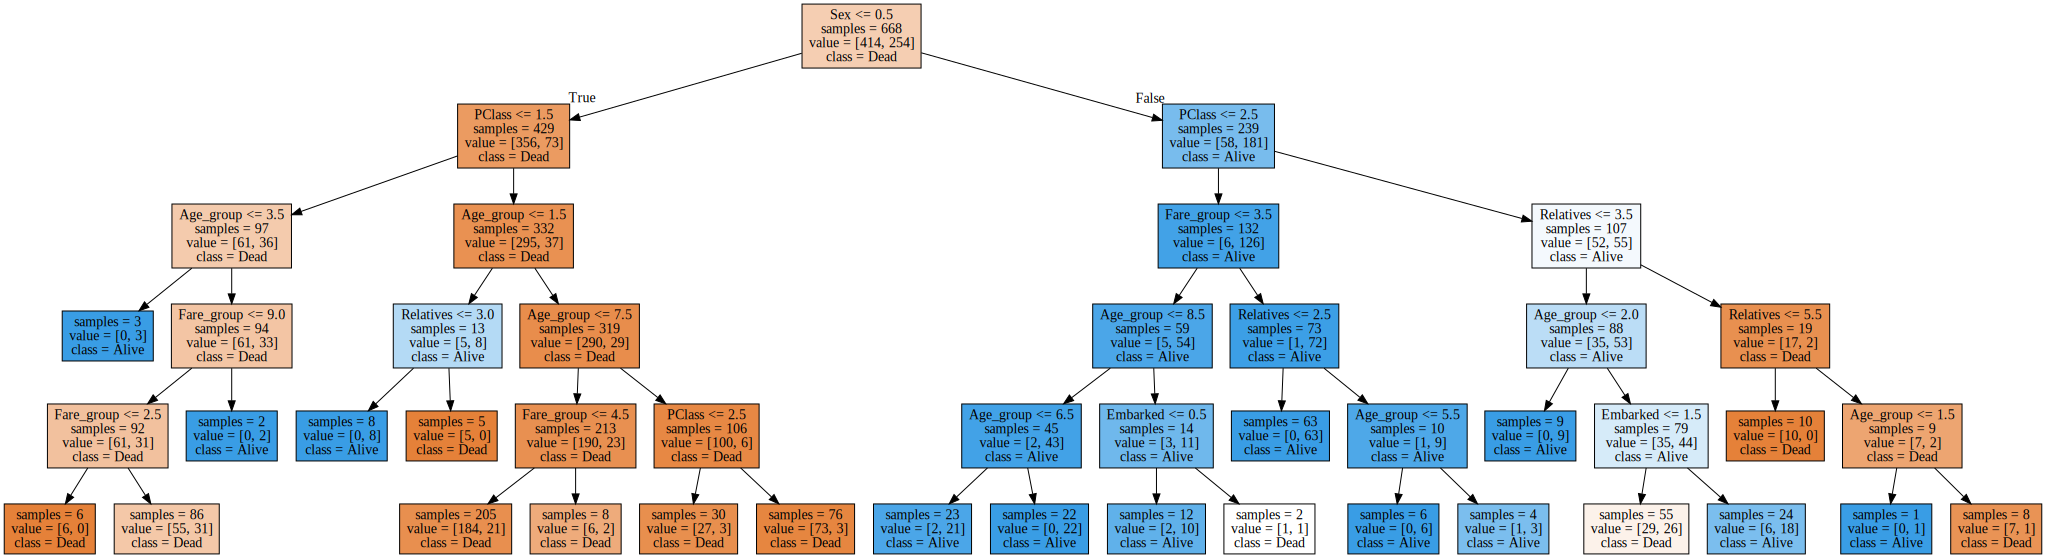

In [1271]:
graph = graphviz.Source(tree)
graph.render('DecTree')  # creates PDF
graph  # in Jupyter

# Goal 4, medium: Perform Cross Validation

In [1258]:
from sklearn.model_selection import cross_val_score

In [1259]:
print("Cross Validation Scores: " + str(cross_val_score(estimator = logreg, cv = 5, X = X_train, y= y_train)))

Cross Validation Scores: [0.8358209  0.84328358 0.76119403 0.80597015 0.84848485]


# Goal 4, hard: Calculate a confidence interval with bootstraping

In [1260]:
from sklearn.utils import resample

In [1261]:
boots = []
for i in range(1000):
    Xb, yb = resample(X_train, y_train)
    logreg.fit(Xb, yb)
    score = logreg.score(Xb, yb)
    boots.append(score)
    print(i, score)

0 0.8458083832335329
1 0.8383233532934131
2 0.8263473053892215
3 0.8188622754491018
4 0.8173652694610778
5 0.8203592814371258
6 0.8203592814371258
7 0.8338323353293413
8 0.8338323353293413
9 0.8188622754491018
10 0.8098802395209581
11 0.8278443113772455
12 0.8473053892215568
13 0.8323353293413174
14 0.8248502994011976
15 0.8173652694610778
16 0.812874251497006
17 0.8038922155688623
18 0.7889221556886228
19 0.8083832335329342
20 0.8398203592814372
21 0.844311377245509
22 0.8293413173652695
23 0.812874251497006
24 0.8293413173652695
25 0.8233532934131736
26 0.8323353293413174
27 0.8038922155688623
28 0.812874251497006
29 0.8488023952095808
30 0.8517964071856288
31 0.8233532934131736
32 0.8083832335329342
33 0.8218562874251497
34 0.8383233532934131
35 0.8293413173652695
36 0.8353293413173652
37 0.8308383233532934
38 0.8188622754491018
39 0.8248502994011976
40 0.8338323353293413
41 0.8353293413173652
42 0.8308383233532934
43 0.8158682634730539
44 0.8368263473053892
45 0.8458083832335329
46

432 0.842814371257485
433 0.8158682634730539
434 0.8008982035928144
435 0.8038922155688623
436 0.8098802395209581
437 0.8248502994011976
438 0.8188622754491018
439 0.844311377245509
440 0.8278443113772455
441 0.8188622754491018
442 0.8263473053892215
443 0.8218562874251497
444 0.8008982035928144
445 0.812874251497006
446 0.8338323353293413
447 0.8323353293413174
448 0.8293413173652695
449 0.811377245508982
450 0.8203592814371258
451 0.8008982035928144
452 0.8502994011976048
453 0.8413173652694611
454 0.8188622754491018
455 0.8233532934131736
456 0.8293413173652695
457 0.7949101796407185
458 0.8098802395209581
459 0.8383233532934131
460 0.8143712574850299
461 0.8383233532934131
462 0.811377245508982
463 0.8368263473053892
464 0.8098802395209581
465 0.8218562874251497
466 0.8547904191616766
467 0.8398203592814372
468 0.8173652694610778
469 0.8308383233532934
470 0.8383233532934131
471 0.8323353293413174
472 0.8413173652694611
473 0.8233532934131736
474 0.8248502994011976
475 0.8233532934

806 0.8562874251497006
807 0.8263473053892215
808 0.8293413173652695
809 0.8023952095808383
810 0.811377245508982
811 0.8053892215568862
812 0.8263473053892215
813 0.8278443113772455
814 0.842814371257485
815 0.8577844311377245
816 0.8308383233532934
817 0.8263473053892215
818 0.8008982035928144
819 0.8233532934131736
820 0.8637724550898204
821 0.8203592814371258
822 0.8263473053892215
823 0.812874251497006
824 0.8278443113772455
825 0.8188622754491018
826 0.8398203592814372
827 0.8248502994011976
828 0.8293413173652695
829 0.8098802395209581
830 0.8308383233532934
831 0.8293413173652695
832 0.8008982035928144
833 0.8383233532934131
834 0.8368263473053892
835 0.8158682634730539
836 0.8383233532934131
837 0.7949101796407185
838 0.811377245508982
839 0.8233532934131736
840 0.8353293413173652
841 0.8263473053892215
842 0.8218562874251497
843 0.7904191616766467
844 0.8188622754491018
845 0.8203592814371258
846 0.8502994011976048
847 0.8293413173652695
848 0.8592814371257484
849 0.835329341

In [1262]:
boots.sort()
ci80 = boots[100:-100]
print(f"80% confidence interval: {ci80[0]:5.2} -{ci80[-1]:5.2}")
ci90 = boots[50:-50]
print(f"90% confidence interval: {ci90[0]:5.2} -{ci90[-1]:5.2}")
ci95 = boots[25:-25]
print(f"95% confidence interval: {ci95[0]:5.2} -{ci95[-1]:5.2}")
ci99 = boots[5:-5]
print(f"99% confidence interval: {ci99[0]:5.2} -{ci99[-1]:5.2}")


80% confidence interval:  0.81 - 0.84
90% confidence interval:   0.8 - 0.85
95% confidence interval:  0.79 - 0.85
99% confidence interval:  0.78 - 0.86


# Goal 3, hard: ROC Curve

In [1263]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [1266]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))

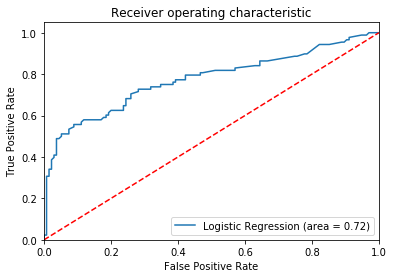

In [1267]:
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Goal 5, easy: Execute a Grid Search

In [1155]:
 from sklearn.model_selection import GridSearchCV

In [1156]:
trees = [i for i in range(1,10)]
depths = [i for i in range(1,25)]


In [1157]:
grid = GridSearchCV(RanFor, 
        param_grid={'n_estimators': trees, 'max_depth': depths},
        scoring='accuracy', 
        n_jobs=1,
        cv=5
        )

In [1158]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [1159]:
grid.best_score_, grid.best_params_

(0.8368263473053892, {'max_depth': 6, 'n_estimators': 8})

In [1160]:
final_model = grid.best_estimator_
final_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=8, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [1161]:
print ("Training score: " + str(final_model.score(X_train,y_train)))
print ("Test score: " + str(final_model.score(X_test,y_test)))

Training score: 0.8607784431137725
Test score: 0.7937219730941704


# Goal 5, medium: Randomized Hyperparameter Search

In [1162]:
import random
random.seed(50)

In [1163]:
random_trees =  random.sample(range(1,20),10)
random_depths = random.sample(range(1,50),25)

In [1164]:
grid = GridSearchCV(RanFor, 
        param_grid={'n_estimators': random_trees, 'max_depth': random_depths},
        scoring='accuracy', 
        n_jobs=1,
        cv=5
        )

In [1165]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [16, 9, 12, 8, 17, 19, 13, 6, 2, 18], 'max_depth': [21, 15, 44, 36, 6, 10, 23, 7, 43, 49, 48, 13, 5, 22, 28, 45, 37, 46, 26, 41, 40, 27, 14, 1, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [1166]:
grid.best_score_, grid.best_params_

final_model = grid.best_estimator_
final_model.fit(X_train,y_train)

print ("Training score: " + str(final_model.score(X_train,y_train)))
print ("Test score: " + str(final_model.score(X_test,y_test)))

Training score: 0.8577844311377245
Test score: 0.7713004484304933


# Goal 5, hard: Modeling Pipeline

In [1059]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm

In [1060]:
Pipelin = Pipeline([
        ('scaler', MinMaxScaler()),
        ('svc', svm.SVC(kernel='linear', C=1.0)),
    ])


In [1061]:
Pipelin.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [1062]:
Pipelin.score(X_train, y_train)

0.8038922155688623

# SVM


In [1167]:
from sklearn.svm import SVC
import numpy as np

In [1168]:
SVM = SVC(kernel='rbf', gamma=0.1, C=0.1)

In [1169]:
SVM.fit(X_train, y_train)
print(m.score(X, y))

0.7497194163860831


# Kaggle Submission formatting

In [1171]:
predict_df.head(3)

,PassengerId,Pclass,Name,Sex,Embarked,Relatives,Solo,Age_Group,Fare_Group
0,892,3,"Kelly, Mr. James",0,2,0,1,8,2.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,0,1,0,9,2.0
2,894,2,"Myles, Mr. Thomas Francis",0,2,0,1,9,2.0


In [1172]:
X_pred = predict_df.drop("PassengerId", axis=1)
X_pred = X_pred.drop("Name", axis=1)

In [1173]:
Y_pred = final_model.predict(X_pred)

In [1174]:
Y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [1175]:
pd.DataFrame(Y_pred)

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,0
8,1
9,0


In [1176]:
predict_df['Survived'] = Y_pred

In [1178]:
Final_df = predict_df[['PassengerId','Survived']]

In [1179]:
Final_df.head(3)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0


In [1180]:
Final_df.to_csv('GBMPredictions.csv', index=None, header=['PassengerId','Survived'])

In [1188]:
!less GBMPredictions.csv

PassengerId,Survived
892,0
893,0
894,0
895,0
896,0
897,0
898,1
899,0
900,1
901,0
902,0
903,0
904,1
905,0
906,1
907,1
908,0
909,0
910,0
911,1
912,0
913,0
914,1redictions.csv
: